In [44]:
from music21 import *
import pickle

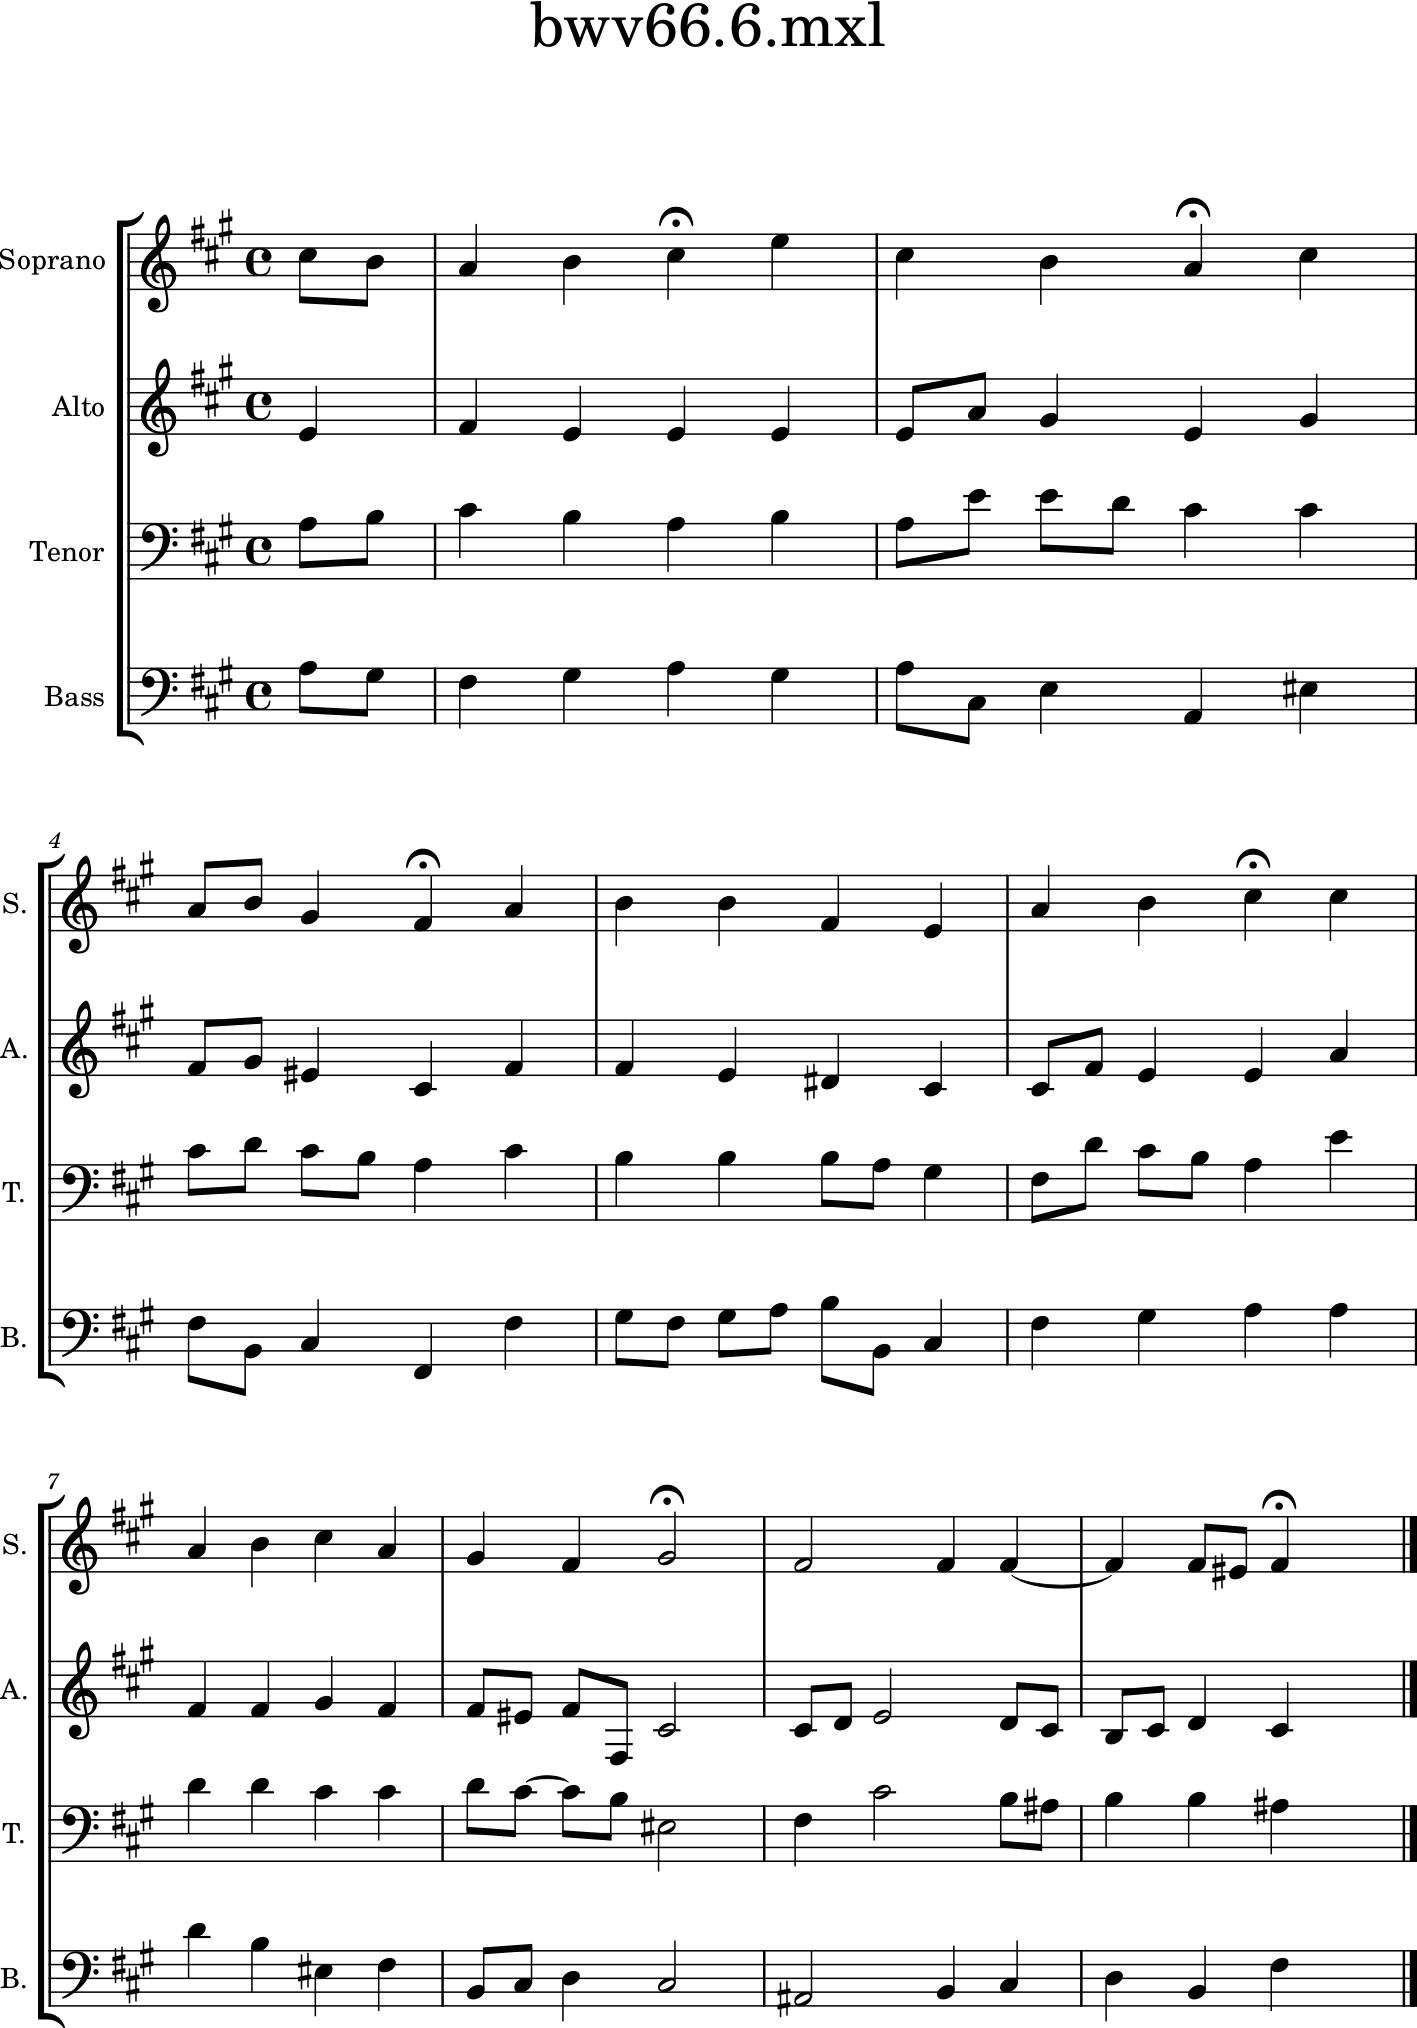

In [41]:
sc = corpus.parse('bach/bwv66.6')
sc.show()

In [57]:
parts_to_parse = []
for part in sc.parts:
    this_part = [] # stores the name followed by a dict of the notes
    part_notes = [] # stores the relevant data for notes and rests as a list with note, timestamp
    running_offset = None
    part_name = part[0].partName # Soprano, Alto, etc
    this_part.append(part_name)
    for el in part.recurse():
        if type(el) == stream.Measure:
            running_offset = el.offset # sets the offset to the measure we have arrived to
        if type(el) == note.Note:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, el.pitch.midi)) # this is where we store the musical data we care about (this could be a tuple of info)
        if type(el) == note.Rest:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, -1)) # rests are stored as -1
    # once we've gone through all the notes in the part, we can store them in a list (where the first index is the highest part and the last is the lowest)
    this_part.append(part_notes)
    parts_to_parse.append(this_part)

print(parts_to_parse)

[['Soprano', [(0.0, 73), (0.5, 71), (1.0, 69), (2.0, 71), (4.0, 73), (7.0, 76), (5.0, 73), (6.0, 71), (8.0, 69), (11.0, 73), (9.0, 69), (9.5, 71), (10.5, 68), (12.5, 66), (15.5, 69), (13.0, 71), (14.0, 71), (16.0, 66), (19.0, 64), (17.0, 69), (18.0, 71), (20.0, 73), (23.0, 73), (21.0, 69), (22.0, 71), (24.0, 73), (27.0, 69), (25.0, 68), (26.0, 66), (28.0, 68), (29.0, 66), (31.0, 66), (34.0, 66), (33.0, 66), (34.0, 66), (35.5, 65), (37.5, 66)]], ['Alto', [(0.0, 64), (1.0, 66), (2.0, 64), (4.0, 64), (7.0, 64), (5.0, 64), (5.5, 69), (6.5, 68), (8.5, 64), (11.5, 68), (9.0, 66), (9.5, 68), (10.5, 65), (12.5, 61), (15.5, 66), (13.0, 66), (14.0, 64), (16.0, 63), (19.0, 61), (17.0, 61), (17.5, 66), (18.5, 64), (20.5, 64), (23.5, 69), (21.0, 66), (22.0, 66), (24.0, 68), (27.0, 66), (25.0, 66), (25.5, 65), (26.5, 66), (28.0, 54), (30.0, 61), (29.0, 61), (29.5, 62), (30.5, 64), (33.5, 62), (37.0, 61), (33.0, 59), (33.5, 61), (34.5, 62), (36.5, 61)]], ['Tenor', [(0.0, 57), (0.5, 59), (1.0, 61), (2

In [58]:
for p in parts_to_parse:
    part_name = p[0]
    with open(f'{part_name}.pickle', 'wb') as handle:
        pickle.dump(p[1], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [61]:
with open('Soprano.pickle', 'rb') as handle:
    unserialized_sop_data = pickle.load(handle)
with open('Alto.pickle', 'rb') as handle:
    unserialized_alto_data = pickle.load(handle)
with open('Tenor.pickle', 'rb') as handle:
    unserialized_ten_data = pickle.load(handle)
with open('Bass.pickle', 'rb') as handle:
    unserialized_bass_data = pickle.load(handle)
print(unserialized_sop_data)
print('------')
print(unserialized_alto_data)
print('------')
print(unserialized_ten_data)
print('------')
print(unserialized_bass_data)

[(0.0, 73), (0.5, 71), (1.0, 69), (2.0, 71), (4.0, 73), (7.0, 76), (5.0, 73), (6.0, 71), (8.0, 69), (11.0, 73), (9.0, 69), (9.5, 71), (10.5, 68), (12.5, 66), (15.5, 69), (13.0, 71), (14.0, 71), (16.0, 66), (19.0, 64), (17.0, 69), (18.0, 71), (20.0, 73), (23.0, 73), (21.0, 69), (22.0, 71), (24.0, 73), (27.0, 69), (25.0, 68), (26.0, 66), (28.0, 68), (29.0, 66), (31.0, 66), (34.0, 66), (33.0, 66), (34.0, 66), (35.5, 65), (37.5, 66)]
------
[(0.0, 64), (1.0, 66), (2.0, 64), (4.0, 64), (7.0, 64), (5.0, 64), (5.5, 69), (6.5, 68), (8.5, 64), (11.5, 68), (9.0, 66), (9.5, 68), (10.5, 65), (12.5, 61), (15.5, 66), (13.0, 66), (14.0, 64), (16.0, 63), (19.0, 61), (17.0, 61), (17.5, 66), (18.5, 64), (20.5, 64), (23.5, 69), (21.0, 66), (22.0, 66), (24.0, 68), (27.0, 66), (25.0, 66), (25.5, 65), (26.5, 66), (28.0, 54), (30.0, 61), (29.0, 61), (29.5, 62), (30.5, 64), (33.5, 62), (37.0, 61), (33.0, 59), (33.5, 61), (34.5, 62), (36.5, 61)]
------
[(0.0, 57), (0.5, 59), (1.0, 61), (2.0, 59), (4.0, 57), (7

In [62]:
# sc.show('midi')

In [64]:
sc.write("midi", "visualized_corpus.mid")

'visualized_corpus.mid'

In [65]:
# sc.write("mp3", "visualized_corpus.mp3") this format is not supported by music21 yet

Music21ObjectException: cannot support showing in this format yet: mp3